In [100]:
import matplotlib.pyplot as plt
import numpy
from astropy.io import fits
from spectrum_overload.spectrum import Spectrum

# HD211847
Plot spectra with models from ACES and BT-Settl


In [101]:
Obs1_name = "/home/jneal/Documents/data/handy/HD211847-1-mixavg-tellcorr_1_bervcorr_masked.fits"
Obs1_name = "/home/jneal/.handy_spectra/HD211847-1-mixavg-tellcorr_1_bervcorr_masked.fits"

aces_name = "data/lte05700-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"
aces_wav_name = "/home/jneal/.data/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits"
settl_name = "data/lte5700-4.50-0.0a+0.0.BT-dusty-giant-2013.cf128.sc.spid.fits"


In [102]:
obs = fits.getdata(Obs1_name)
settl= fits.getdata(settl_name)
aces = fits.getdata(aces_name)
aces_wav = fits.getdata(aces_wav_name)

aces_spec = Spectrum(xaxis=aces_wav/10, flux=aces, header=fits.getheader(aces_name))
settl_spec = Spectrum(xaxis=settl["Wavelength"]*1e3, flux=settl["flux"], header=fits.getheader(settl_name, 1))
obs_spec = Spectrum(xaxis=obs["wavelength"], flux=obs["flux"], header=fits.getheader(Obs1_name))

In [103]:
# Normalize
aces_spec.wav_select(wav_min=2100, wav_max=2160)
aces_spec = aces_spec.normalize(method="poly", degree=3)

settl_spec.wav_select(wav_min=2100, wav_max=2160)
settl_spec = settl_spec.normalize(method="poly", degree=3)

# Connvolve 
from convolve_spectrum import convolve_spectrum
R = 50000
aces_spec = convolve_spectrum(aces_spec, chip_limits=[aces_spec.xaxis[0], aces_spec.xaxis[-1]], R=R, plot=False)
settl_spec = convolve_spectrum(settl_spec, chip_limits=[settl_spec.xaxis[0], settl_spec.xaxis[-1]], R=R, plot=False)

2018-02-16 11:07:13,294 WARNING VerifyWarning: Keyword name 'normalized' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
/home/jneal/Phd/Codes/spectrum_overload/spectrum_overload/norm.py:75: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(wave_points, flux_points, deg=poly_degree[method])
100%|██████████| 11999/11999 [00:00<00:00, 27849.46it/s]


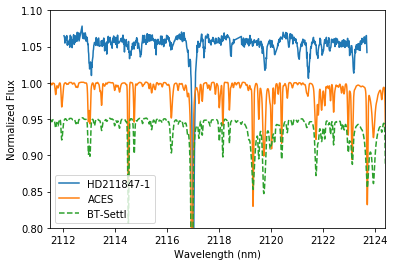

In [106]:
plt.plot(obs_spec.xaxis, obs_spec.flux + 0.05, label="HD211847-1")
plt.plot(aces_spec.xaxis, aces_spec.flux, label="ACES")
plt.plot(settl_spec.xaxis, settl_spec.flux - 0.05, "--", label="BT-Settl")
plt.legend()
plt.xlim(2111.5, 2124.4)
plt.ylim([0.8,1.1])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Flux")
plt.show()